In [5]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [14]:
columns=['sepal lengthcm','sepal widthcm','petal lengthcm','petal widthcm','species']
df=pd.read_csv('iris.data',names=columns)
df.head(150)

,sepal lengthcm,sepal widthcm,petal lengthcm,petal widthcm,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [10]:
df.describe()


,sepal length,sepal width,petal length
count,150.000000,150.000000,150.000000
mean,3.054000,3.758667,1.198667
std,0.433594,1.764420,0.763161
min,2.000000,1.000000,0.100000
25%,2.800000,1.600000,0.300000
50%,3.000000,4.350000,1.300000
75%,3.300000,5.100000,1.800000
max,4.400000,6.900000,2.500000


In [15]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sepal lengthcm  150 non-null    float64
 1   sepal widthcm   150 non-null    float64
 2   petal lengthcm  150 non-null    float64
 3   petal widthcm   150 non-null    float64
 4   species         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [16]:
df['species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64

In [61]:
df.isnull().sum()

sepal lengthcm    0
sepal widthcm     0
petal lengthcm    0
petal widthcm     0
species           0
dtype: int64

<AxesSubplot:>

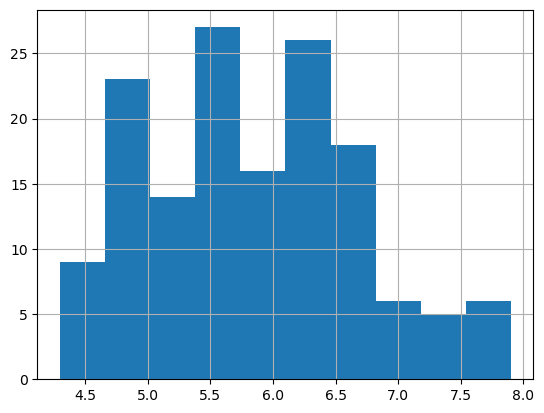

In [62]:
df['sepal lengthcm'].hist()

<AxesSubplot:>

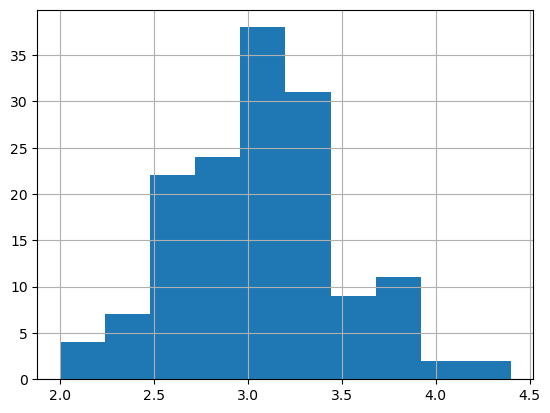

In [20]:
df['sepal widthcm'].hist()

<AxesSubplot:>

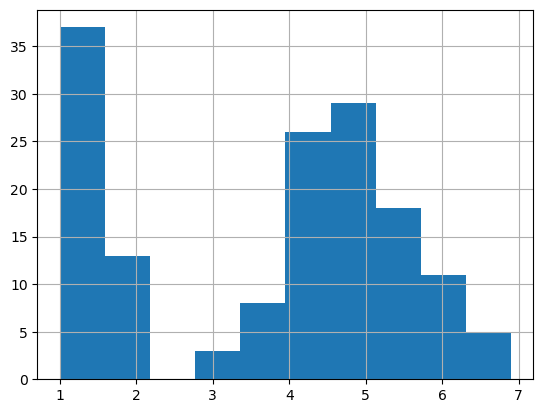

In [22]:
df['petal lengthcm'].hist()

<AxesSubplot:>

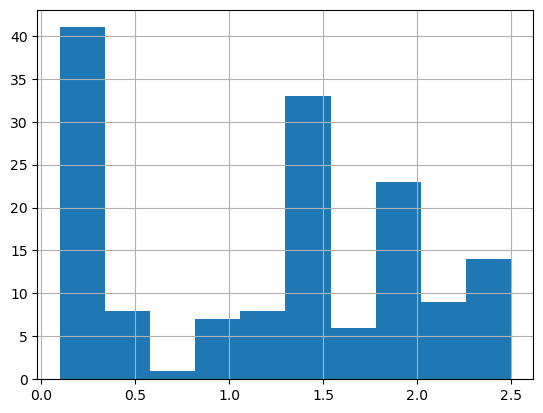

In [21]:
df['petal widthcm'].hist()

In [25]:
colors=['red','orange','blue']
species=['Iris-setosa','Iris-versicolor','Iris-virginica']

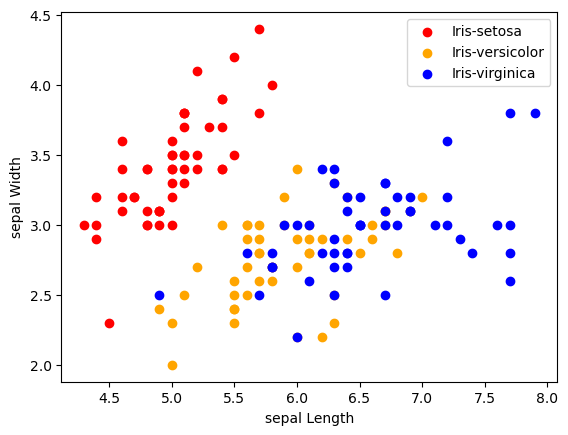

In [27]:
for i in range (3):
    x=df[df['species']==species[i]]
    plt.scatter(x['sepal lengthcm'],x['sepal widthcm'],c=colors[i],label=species[i])
    plt.xlabel("sepal Length")
    plt.ylabel("sepal Width")
    plt.legend()

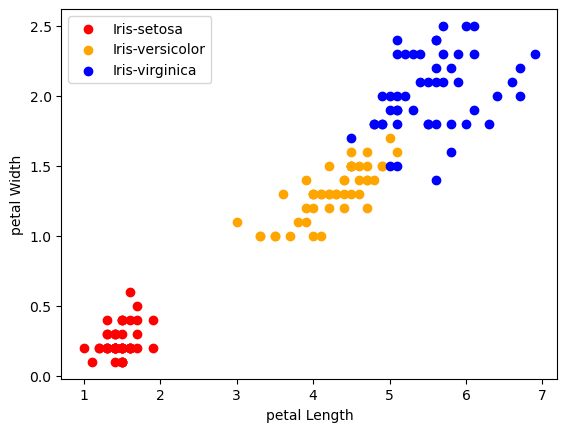

In [28]:
 for i in range (3):
    x=df[df['species']==species[i]]
    plt.scatter(x['petal lengthcm'],x['petal widthcm'],c=colors[i],label=species[i])
    plt.xlabel("petal Length")
    plt.ylabel("petal Width")
    plt.legend()

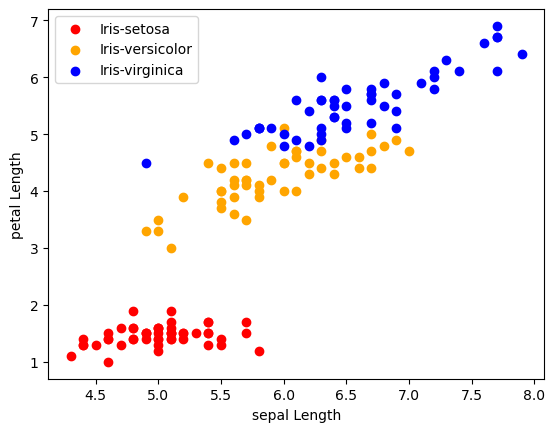

In [29]:
for i in range (3):
    x=df[df['species']==species[i]]
    plt.scatter(x['sepal lengthcm'],x['petal lengthcm'],c=colors[i],label=species[i])
    plt.xlabel("sepal Length")
    plt.ylabel("petal Length")
    plt.legend()

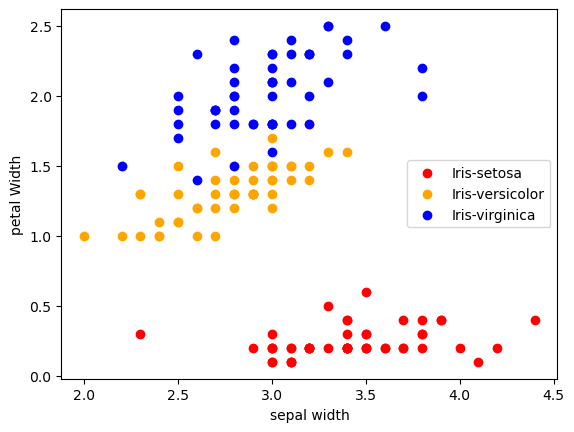

In [31]:
for i in range (3):
    x=df[df['species']==species[i]]
    plt.scatter(x['sepal widthcm'],x['petal widthcm'],c=colors[i],label=species[i])
    plt.xlabel("sepal width")
    plt.ylabel("petal Width")
    plt.legend()

In [32]:
df.corr()

,sepal lengthcm,sepal widthcm,petal lengthcm,petal widthcm
sepal lengthcm,1.000000,-0.109369,0.871754,0.817954
sepal widthcm,-0.109369,1.000000,-0.420516,-0.356544
petal lengthcm,0.871754,-0.420516,1.000000,0.962757
petal widthcm,0.817954,-0.356544,0.962757,1.000000


<AxesSubplot:>

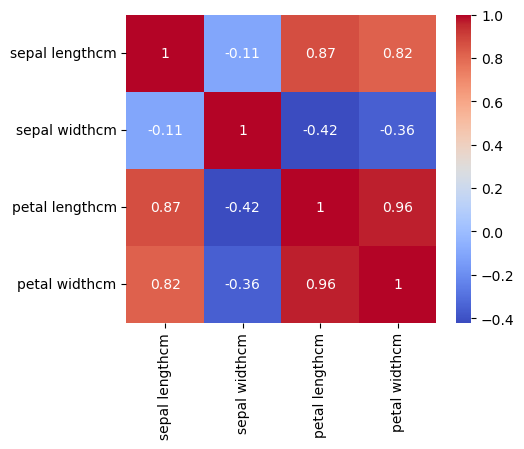

In [34]:
corr=df.corr()
fig,ax=plt.subplots(figsize=(5,4))
sns.heatmap(corr,annot=True,ax=ax,cmap='coolwarm')

In [1]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['species']=le.fit_transform(df['species'])
df.head()

NameError: name 'df' is not defined

In [ ]:
from sklearn.model_selection import train_test_split
X=df.drop(columns=['species'])
Y=df['species']
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.30)

In [51]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [52]:
print("Acurracy:",model.score(x_test,y_test)*100)

Acurracy: 100.0


In [55]:
from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier()
model.fit(x_train,y_train)

KNeighborsClassifier()

In [56]:
print("Acurracy:",model.score(x_test,y_test)*100)

Acurracy: 100.0


E:\anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [59]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier()
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [60]:
print("Acurracy:",model.score(x_test,y_test)*100)

Acurracy: 95.55555555555556
